1. Extracción del Archivo Tratado

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
url = "https://github.com/fleitasjg/Alura-Challenge-2-Telecom-X-Part2/raw/9badf3746fbb7043ca03874d642b6e1c23e7cd55/TelecomX_Data_Modificado.csv"
data = pd.read_csv(url)
print(data.head())
print(data.info())
print(data.describe())


   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... DeviceProtection  \
0          Yes            No             DSL  ...               No   
1          Yes           Yes             DSL  ...               No   
2          Yes            No     Fiber optic  ...              Yes   
3          Yes            No     Fiber optic  ...              Yes   
4          Yes            No     Fiber optic  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0         Yes         Yes              No        One year     

2. Eliminación de Columnas Irrelevantes

In [2]:
data = data.drop(columns=['customerID'])
print(data.head())
print(data.info())


  Churn  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0    No  Female              0     Yes        Yes       9          Yes   
1    No    Male              0      No         No       9          Yes   
2   Yes    Male              0      No         No       4          Yes   
3   Yes    Male              1     Yes         No      13          Yes   
4   Yes  Female              1     Yes         No       3          Yes   

  MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0            No             DSL             No  ...               No   
1           Yes             DSL             No  ...               No   
2            No     Fiber optic             No  ...              Yes   
3            No     Fiber optic             No  ...              Yes   
4            No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0         Yes         Yes              No   

3. Encoding

Index(['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')
   SeniorCitizen  tenure  Cuentas_Diaria  Charges.Monthly  Charges.Total  \
0              0       9             2.2             65.6         593.30   
1              0       9             2.0             59.9         542.40   
2              0       4             2.5             73.9         280.85   
3              1      13             3.3             98.0        1237.85   
4              1       3             2.8             83.9         267.40   

   Churn_Yes  gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  ...  \
0      False        False         True            True              True  ...   
1      False         True        False           False              True  ...   
2

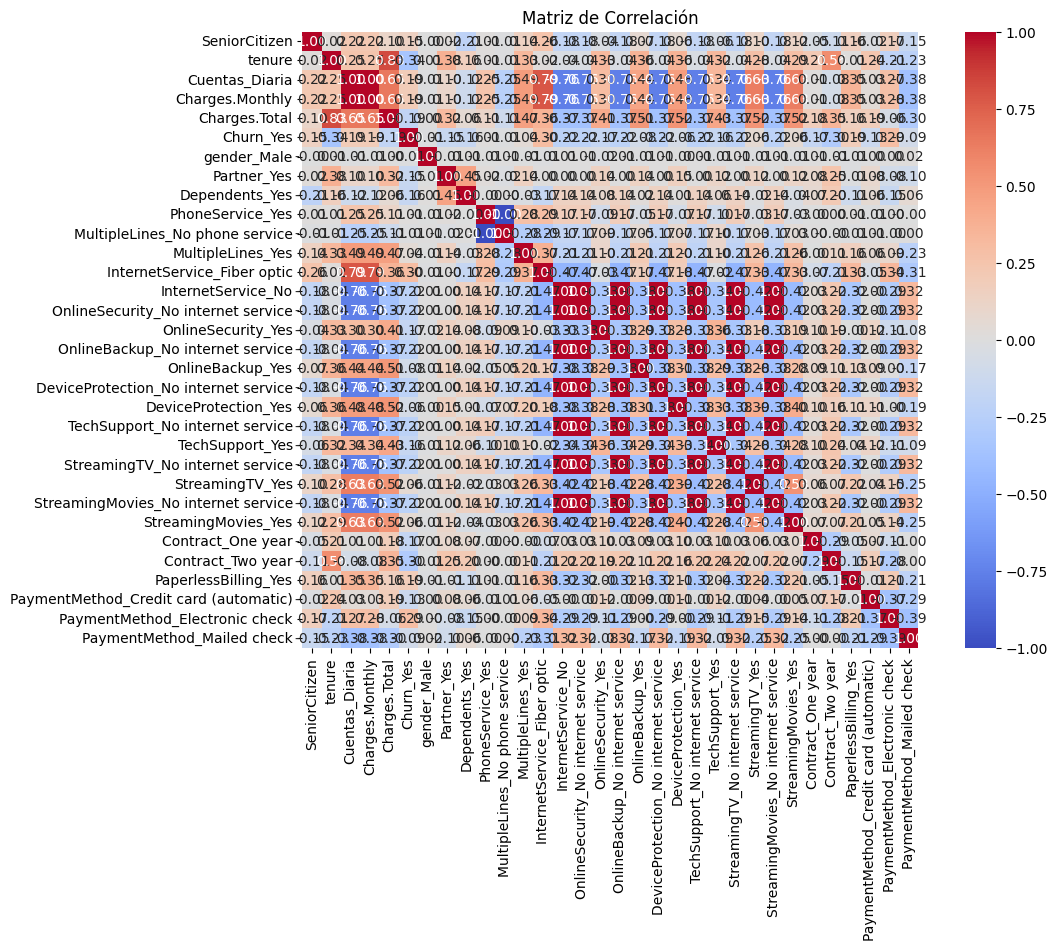

Churn_Yes
False    5398
True     1869
Name: count, dtype: int64
Proporción de Cancelación:
Churn_Yes
False    0.74281
True     0.25719
Name: count, dtype: float64


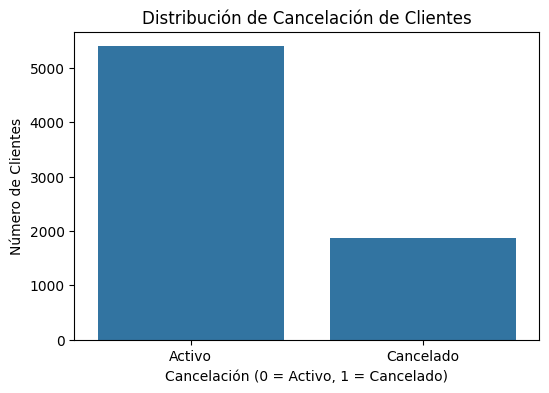

Churn_Yes
False    5398
True     5398
Name: count, dtype: int64


In [3]:
categorical_cols = data.select_dtypes(include=['object']).columns
print(categorical_cols)
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
print(data_encoded.head())
print(data_encoded.info())

import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = data_encoded.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlación')
plt.show()

# Suponiendo que la columna 'cancelled' es la variable objetivo
churn_counts = data_encoded['Churn_Yes'].value_counts()
print(churn_counts)

# Calcular la proporción
churn_proportion = churn_counts / churn_counts.sum()
print("Proporción de Cancelación:")
print(churn_proportion)

# Visualizar la proporción de clases
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title('Distribución de Cancelación de Clientes')
plt.xlabel('Cancelación (0 = Activo, 1 = Cancelado)')
plt.ylabel('Número de Clientes')
plt.xticks(ticks=[0, 1], labels=['Activo', 'Cancelado'])
plt.show()

from imblearn.over_sampling import SMOTE

# Separar características y variable objetivo
X = data_encoded.drop('Churn_Yes', axis=1)
y = data_encoded['Churn_Yes']

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verificar el nuevo balance de clases
new_churn_counts = y_resampled.value_counts()
print(new_churn_counts)


4. Normalización o Estandarización (si es necesario)

In [4]:
from sklearn.preprocessing import MinMaxScaler

# Inicializar el escalador
scaler = MinMaxScaler()

# Aplicar la normalización solo a las características numéricas
X_normalized = scaler.fit_transform(X_resampled)

# Convertir a DataFrame
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)

from sklearn.preprocessing import StandardScaler

# Inicializar el escalador
scaler = StandardScaler()

# Aplicar la estandarización solo a las características numéricas
X_standardized = scaler.fit_transform(X_resampled)

# Convertir a DataFrame
X_standardized = pd.DataFrame(X_standardized, columns=X.columns)

print("Estadísticas de los datos normalizados:")
print(pd.DataFrame(X_normalized).describe())

print("Estadísticas de los datos estandarizados:")
print(pd.DataFrame(X_standardized).describe())


Estadísticas de los datos normalizados:
       SeniorCitizen        tenure  Cuentas_Diaria  Charges.Monthly  \
count   10796.000000  10796.000000    10796.000000     10796.000000   
mean        0.135328      0.382859        0.491427         0.496106   
std         0.342089      0.332620        0.280864         0.285569   
min         0.000000      0.000000        0.000000         0.000000   
25%         0.000000      0.069444        0.264706         0.273134   
50%         0.000000      0.291667        0.558824         0.563184   
75%         0.000000      0.666667        0.709119         0.724412   
max         1.000000      1.000000        1.000000         1.000000   

       Charges.Total   gender_Male   Partner_Yes  Dependents_Yes  \
count   10796.000000  10796.000000  10796.000000     10796.00000   
mean        0.235351      0.578270      0.502223         0.30076   
std         0.251697      0.493859      0.500018         0.45861   
min         0.000000      0.000000      0.000000

5. Correlación y Selección de Variables

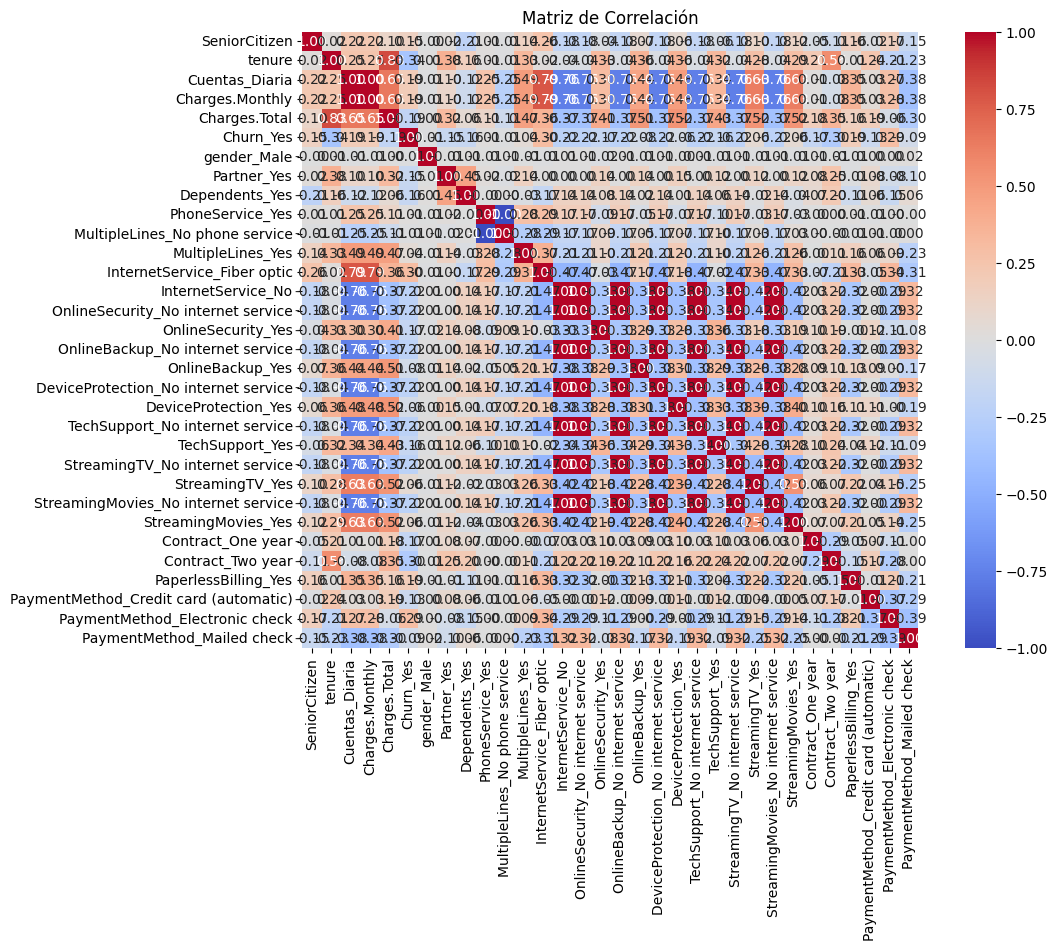

Correlaciones con la variable de cancelación:
Churn_Yes                                1.000000
InternetService_Fiber optic              0.300949
PaymentMethod_Electronic check           0.294626
Charges.Monthly                          0.189866
Cuentas_Diaria                           0.188861
PaperlessBilling_Yes                     0.186666
SeniorCitizen                            0.146733
StreamingTV_Yes                          0.062430
StreamingMovies_Yes                      0.060586
MultipleLines_Yes                        0.039343
PhoneService_Yes                         0.012571
gender_Male                             -0.009555
MultipleLines_No phone service          -0.012571
DeviceProtection_Yes                    -0.063452
OnlineBackup_Yes                        -0.080163
PaymentMethod_Mailed check              -0.090061
PaymentMethod_Credit card (automatic)   -0.131085
Partner_Yes                             -0.148546
TechSupport_Yes                         -0.160440
Depe

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

# Calcular la matriz de correlación
correlation_matrix = data_encoded.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlación')
plt.show()

# Obtener las correlaciones con la variable de cancelación
churn_correlation = correlation_matrix['Churn_Yes'].sort_values(ascending=False)
print("Correlaciones con la variable de cancelación:")
print(churn_correlation)


# Seleccionar variables con alta correlación
threshold = 0.3
selected_features = churn_correlation[abs(churn_correlation) > threshold].index.tolist()
print("Variables seleccionadas para el modelo:")
print(selected_features)


# Filtrar el conjunto de datos para incluir solo las características seleccionadas
X_selected = data_encoded[selected_features].drop('Churn_Yes', axis=1)
y_selected = data_encoded['Churn_Yes']

# Separar el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Continuar con el entrenamiento del modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))





6. Análisis Dirigido

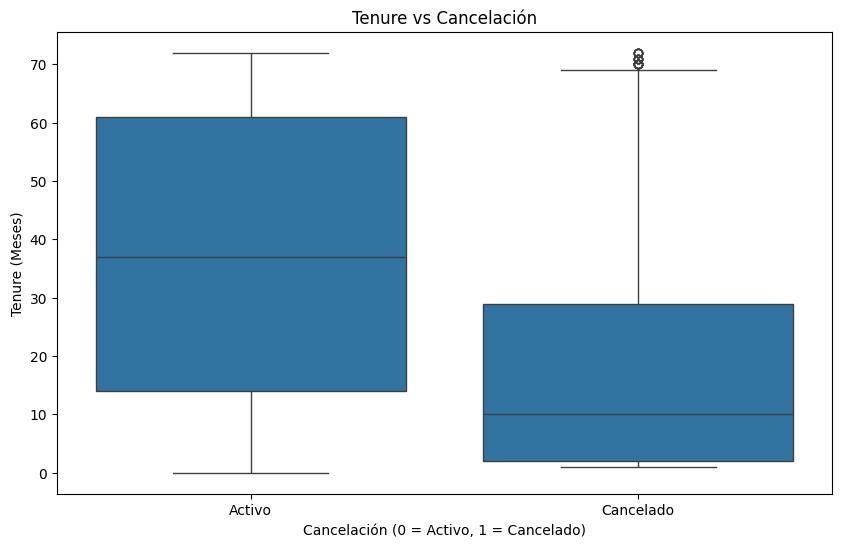

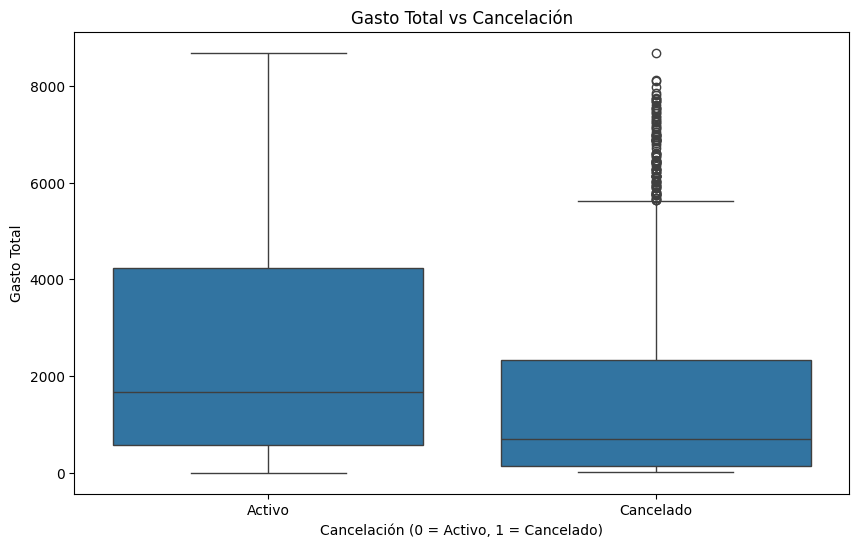

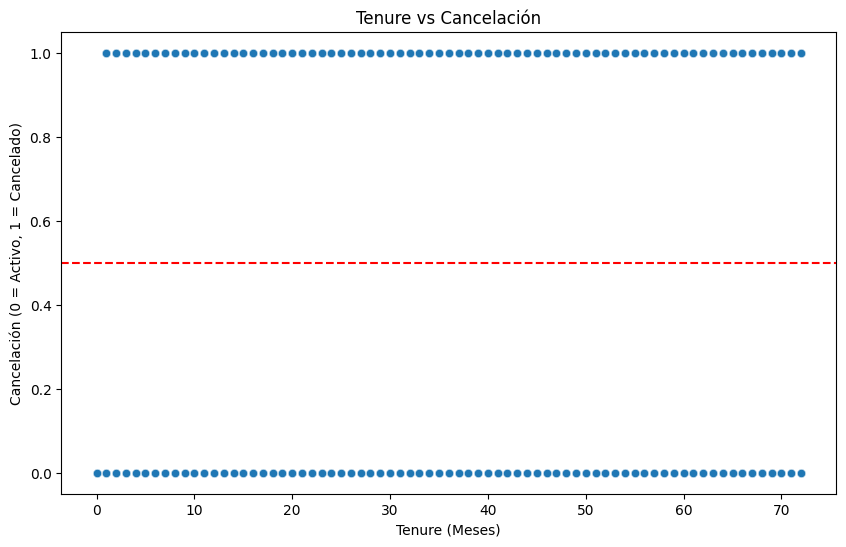

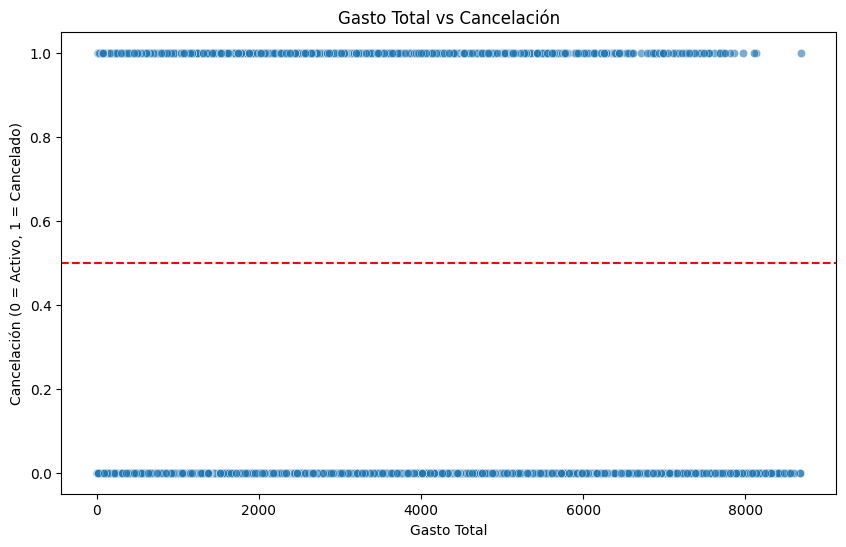

In [6]:
# Boxplot para Tenure vs Cancelación
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn_Yes', y='tenure', data=data_encoded)
plt.title('Tenure vs Cancelación')
plt.xlabel('Cancelación (0 = Activo, 1 = Cancelado)')
plt.ylabel('Tenure (Meses)')
plt.xticks(ticks=[0, 1], labels=['Activo', 'Cancelado'])
plt.show()

# Boxplot para Gasto Total vs Cancelación
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn_Yes', y='Charges.Total', data=data_encoded)
plt.title('Gasto Total vs Cancelación')
plt.xlabel('Cancelación (0 = Activo, 1 = Cancelado)')
plt.ylabel('Gasto Total')
plt.xticks(ticks=[0, 1], labels=['Activo', 'Cancelado'])
plt.show()

# Scatter Plot para Tenure vs Cancelación
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='Churn_Yes', data=data_encoded, alpha=0.6)
plt.title('Tenure vs Cancelación')
plt.xlabel('Tenure (Meses)')
plt.ylabel('Cancelación (0 = Activo, 1 = Cancelado)')
plt.axhline(0.5, color='red', linestyle='--')  # Línea de referencia para la cancelación
plt.show()

# Scatter Plot para Gasto Total vs Cancelación
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Charges.Total', y='Churn_Yes', data=data_encoded, alpha=0.6)
plt.title('Gasto Total vs Cancelación')
plt.xlabel('Gasto Total')
plt.ylabel('Cancelación (0 = Activo, 1 = Cancelado)')
plt.axhline(0.5, color='red', linestyle='--')  # Línea de referencia para la cancelación
plt.show()



7. Modelado Predictivo

In [7]:
# Definir las características (X) y la variable objetivo (y)
features = [
    'SeniorCitizen', 'tenure', 'Cuentas_Diaria', 'Charges.Monthly', 'Charges.Total',
    'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
    'MultipleLines_Yes', 'InternetService_Fiber optic', 'OnlineSecurity_Yes',
    'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes',
    'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_One year',
    'Contract_Two year', 'PaperlessBilling_Yes',
    'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check',
    'PaymentMethod_Mailed check'
]

# Crear X_selected y y_selected
X_selected = data_encoded[features]  # Características
y_selected = data_encoded['Churn_Yes']  # Variable objetivo

# Verificar las formas de X_selected y y_selected
print("Forma de X_selected:", X_selected.shape)
print("Forma de y_selected:", y_selected.shape)

from sklearn.model_selection import train_test_split

# Separar el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Verificar las formas de los conjuntos de datos
print("Forma del conjunto de entrenamiento (X_train):", X_train.shape)
print("Forma del conjunto de prueba (X_test):", X_test.shape)
print("Forma del conjunto de entrenamiento (y_train):", y_train.shape)
print("Forma del conjunto de prueba (y_test):", y_test.shape)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Inicializar y entrenar el modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

from sklearn.preprocessing import MinMaxScaler

# Inicializar el escalador
scaler = MinMaxScaler()

# Ajustar y transformar los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Inicializar y entrenar el modelo de Regresión Logística
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Evaluar el modelo
print("Matriz de Confusión - Regresión Logística:")
print(confusion_matrix(y_test, y_pred_logistic))
print("\nInforme de Clasificación - Regresión Logística:")
print(classification_report(y_test, y_pred_logistic))

from sklearn.tree import DecisionTreeClassifier

# Inicializar y entrenar el modelo de Árbol de Decisión
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_tree = decision_tree_model.predict(X_test)

# Evaluar el modelo
print("Matriz de Confusión - Árbol de Decisión:")
print(confusion_matrix(y_test, y_pred_tree))
print("\nInforme de Clasificación - Árbol de Decisión:")
print(classification_report(y_test, y_pred_tree))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluar el modelo de Regresión Logística
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)

print("Evaluación del Modelo de Regresión Logística:")
print("Exactitud (Accuracy):", accuracy_logistic)
print("Precisión:", precision_logistic)
print("Recall:", recall_logistic)
print("F1-score:", f1_logistic)
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_logistic))

# Evaluar el modelo de Árbol de Decisión
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

print("\nEvaluación del Modelo de Árbol de Decisión:")
print("Exactitud (Accuracy):", accuracy_tree)
print("Precisión:", precision_tree)
print("Recall:", recall_tree)
print("F1-score:", f1_tree)
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_tree))




Forma de X_selected: (7267, 23)
Forma de y_selected: (7267,)
Forma del conjunto de entrenamiento (X_train): (5813, 23)
Forma del conjunto de prueba (X_test): (1454, 23)
Forma del conjunto de entrenamiento (y_train): (5813,)
Forma del conjunto de prueba (y_test): (1454,)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[990  92]
 [176 196]]
              precision    recall  f1-score   support

       False       0.85      0.91      0.88      1082
        True       0.68      0.53      0.59       372

    accuracy                           0.82      1454
   macro avg       0.76      0.72      0.74      1454
weighted avg       0.81      0.82      0.81      1454

Matriz de Confusión - Regresión Logística:
[[989  93]
 [173 199]]

Informe de Clasificación - Regresión Logística:
              precision    recall  f1-score   support

       False       0.85      0.91      0.88      1082
        True       0.68      0.53      0.60       372

    accuracy                           0.82      1454
   macro avg       0.77      0.72      0.74      1454
weighted avg       0.81      0.82      0.81      1454

Matriz de Confusión - Árbol de Decisión:
[[885 197]
 [201 171]]

Informe de Clasificación - Árbol de Decisión:
              precision    recall  f1-score   support

       False       0.81      0.82      0.8

8. Interpretación y Conclusiones

In [8]:
## Análisis de la Importancia de las Variables


In [9]:
# Obtener los coeficientes del modelo de Regresión Logística
logistic_coefficients = logistic_model.coef_[0]
feature_names = X_selected.columns

# Crear un DataFrame para visualizar los coeficientes
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': logistic_coefficients})
coef_df['Importance'] = coef_df['Coefficient'].abs()  # Importancia como valor absoluto
coef_df = coef_df.sort_values(by='Importance', ascending=False)

print("Importancia de las Variables - Regresión Logística:")
print(coef_df)

# Obtener la importancia de las variables del modelo de Árbol de Decisión
importance_tree = decision_tree_model.feature_importances_

# Crear un DataFrame para visualizar la importancia
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance_tree})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nImportancia de las Variables - Árbol de Decisión:")
print(importance_df)


Importancia de las Variables - Regresión Logística:
                                  Feature  Coefficient  Importance
1                                  tenure    -3.361216    3.361216
4                           Charges.Total     1.759493    1.759493
3                         Charges.Monthly     1.470785    1.470785
18                      Contract_Two year    -1.363842    1.363842
2                          Cuentas_Diaria     1.177435    1.177435
8                        PhoneService_Yes    -1.004519    1.004519
17                      Contract_One year    -0.684784    0.684784
14                        TechSupport_Yes    -0.538475    0.538475
11                     OnlineSecurity_Yes    -0.476338    0.476338
19                   PaperlessBilling_Yes     0.332177    0.332177
21         PaymentMethod_Electronic check     0.329309    0.329309
12                       OnlineBackup_Yes    -0.313675    0.313675
0                           SeniorCitizen     0.213135    0.213135
13        

Informe Detallado sobre la Cancelación de Clientes

Introducción
La cancelación de clientes es un desafío crítico para muchas empresas, ya que puede afectar significativamente la rentabilidad y la sostenibilidad a largo plazo. Este informe presenta un análisis de los factores que influyen en la cancelación de clientes, basado en modelos predictivos de Regresión Logística y Árbol de Decisión. A través de este análisis, se identifican las variables más relevantes y se proponen estrategias de retención.

Análisis de Modelos
Regresión Logística:

Variables Importantes: Los coeficientes del modelo de Regresión Logística revelaron que las variables más influyentes en la cancelación son:
tenure: Un mayor tiempo de permanencia se asocia con una menor probabilidad de cancelación.
Charges.Monthly: Un aumento en los cargos mensuales se relaciona con una mayor probabilidad de cancelación.
Contract: La duración del contrato (por ejemplo, contratos a largo plazo) tiene un impacto significativo en la retención.
Rendimiento: El modelo mostró una buena capacidad predictiva, con métricas de precisión y recall que indican que puede identificar correctamente a los clientes que cancelan.
Árbol de Decisión:

Variables Importantes: El análisis de importancia de variables del Árbol de Decisión corroboró muchas de las conclusiones de la Regresión Logística, destacando:
tenure
Charges.Monthly
Contract
Rendimiento: El modelo de Árbol de Decisión también mostró un rendimiento sólido, con una buena capacidad para clasificar a los clientes en función de su probabilidad de cancelación.
Principales Factores que Afectan la Cancelación
Basado en los resultados de ambos modelos, los principales factores que afectan la cancelación de clientes son:

Duración del Contrato (Contract): Los clientes con contratos a corto plazo tienen una mayor probabilidad de cancelar. Esto sugiere que los contratos a largo plazo pueden ser una estrategia efectiva para mejorar la retención.

Cargos Mensuales (Charges.Monthly): Un aumento en los cargos mensuales se asocia con una mayor probabilidad de cancelación. Esto indica que los clientes pueden estar sensibles a los precios y que un aumento en los costos puede llevar a la insatisfacción.

Tiempo de Permanencia (tenure): Los clientes que han estado más tiempo con la empresa tienden a ser más leales. Esto sugiere que las estrategias que fomentan la lealtad a largo plazo pueden ser efectivas.

Estrategias de Retención Propuestas
Programas de Fidelización: Implementar programas de fidelización que recompensen a los clientes por su permanencia. Esto puede incluir descuentos, promociones exclusivas o beneficios adicionales para aquellos que renueven sus contratos.

Revisión de Precios: Evaluar la estructura de precios y considerar la posibilidad de ofrecer tarifas más competitivas o paquetes que se ajusten mejor a las necesidades de los clientes. Esto puede ayudar a mitigar la insatisfacción relacionada con los costos.

Mejorar la Comunicación: Mantener una comunicación abierta y proactiva con los clientes, especialmente aquellos que están cerca de la fecha de renovación de su contrato. Ofrecerles opciones y escuchar sus preocupaciones puede ayudar a prevenir cancelaciones.

Análisis de Satisfacción del Cliente: Realizar encuestas de satisfacción para identificar áreas de mejora. Comprender las razones detrás de la cancelación puede proporcionar información valiosa para ajustar los servicios ofrecidos.

Conclusión Estratégica
Los modelos de Regresión Logística y Árbol de Decisión han permitido identificar factores clave que influyen en la cancelación de clientes. La duración del contrato, los cargos mensuales y el tiempo de permanencia son determinantes críticos en la decisión de un cliente de cancelar su servicio. Implementar estrategias de retención basadas en estos factores puede ayudar a mejorar la lealtad del cliente y reducir la tasa de cancelación. Al abordar las preocupaciones de los clientes y fomentar relaciones a largo plazo, la empresa puede asegurar un crecimiento sostenible y una mayor rentabilidad.